In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data=sio.loadmat('ex4data1.mat')
raw_X=data['X']
raw_y=data['y']

In [2]:
raw_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
raw_y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [4]:
X=np.insert(raw_X,0,values=1,axis=1)
X.shape

(5000, 401)

In [5]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [6]:
def one_hot_encode(raw_y):

    result=[]

    for i in raw_y:
        y_temp=np.zeros(10)
        y_temp[i-1]=1

        result.append(y_temp)

    return np.array(result)

In [7]:
y=one_hot_encode(raw_y)

In [8]:
y.shape

(5000, 10)

In [9]:
theta=sio.loadmat('ex4weights.mat')

theta1,theta2=theta['Theta1'],theta['Theta2']
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [10]:
def serialize(a,b):
    return np.append(a.flatten(),b.flatten())

In [11]:
theta_serialize=serialize(theta1,theta2)

In [12]:
theta_serialize.shape

(10285,)

In [13]:
def deserialize(theta_serialize):
    theta1=theta_serialize[:25*401].reshape(25,401)
    theta2=theta_serialize[25*401:].reshape(10,26)

    return theta1,theta2

In [14]:
theta1,theta2=deserialize(theta_serialize)

In [15]:
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [17]:
def feed_forward(theta_serialize,X):
    theta1,theta2=deserialize(theta_serialize)
    a1=X
    z2=a1@theta1.T
    a2=sigmoid(z2)
    a2=np.insert(a2,0,values=1,axis=1)
    z3=a2@theta2.T
    h=sigmoid(z3)

    return a1,z2,a2,z3,h

In [18]:
def cost(theta_serialize,X,y):
    a1,z2,a2,z3,h=feed_forward(theta_serialize,X)
    J=-np.sum(y*np.log(h)+(1-y)*np.log(1-h))/len(X)
    return J

In [19]:
cost(theta_serialize,X,y)

0.2876291651613189

In [20]:
def reg_cost(theta_serialize,X,y,lamda):
    sum1=np.sum(np.power(theta1[:,1:],2))
    sum2=np.sum(np.power(theta2[:,1:],2))
    reg=(sum1+sum2)*lamda/(2*len(X))

    return reg+cost(theta_serialize,X,y)

In [21]:
lamda=1
reg_cost(theta_serialize,X,y,lamda)

0.38376985909092365

In [22]:
def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))

In [23]:
def gradient(theta_serialize,X,y):
    theta1,theta2=deserialize(theta_serialize)
    a1,z2,a2,z3,h=feed_forward(theta_serialize,X)
    d3=h-y
    d2=d3@theta2[:,1:]*sigmoid_gradient(z2)
    D2=(d3.T@a2)/len(X)
    D1=(d2.T@a1)/len(X)

    return serialize(D1,D2)

In [24]:
def reg_gradient(theta_serialize,X,y,lamda):
    D=gradient(theta_serialize,X,y)
    D1,D2=deserialize(D)

    theta1,theta2=deserialize(theta_serialize)
    D1[:,1:]=D1[:,1:]+theta1[:,1:]*lamda/len(X)
    D2[:,1:]=D2[:,1:]+theta2[:,1:]*lamda/len(X)

    return serialize(D1,D2)

In [25]:
def nn_training(X,y):

    init_theta=np.random.uniform(-0.5,0.5,10285)
    res=minimize(fun=reg_cost,
                 x0=init_theta,
                 args=(X,y,lamda),
                 method='TNC',
                 jac=reg_gradient,
                 options={'maxfun':300})
    
    return res

In [26]:
lamda=10
res=nn_training(X,y)

In [27]:
raw_y=data['y'].reshape(5000,)
_,_,_,_,h=feed_forward(res.x,X)
y_pred=np.argmax(h,axis=1)+1
acc=np.mean(y_pred==raw_y)

In [28]:
acc


0.9412

In [29]:
def plot_hidden_layer(theta):
    theta1,_=deserialize(theta)
    hidden_layer=theta1[:,1:]

    fig,ax=plt.subplots(ncols=5,nrows=5,figsize=(8,8),sharex=True,sharey=True)

    for i in range(5):
        for j in range(5):
            ax[i,j].imshow(hidden_layer[5*i+j].reshape(20,20).T,cmap='gray_r')

    plt.xticks([])
    plt.yticks([])

    plt.show()

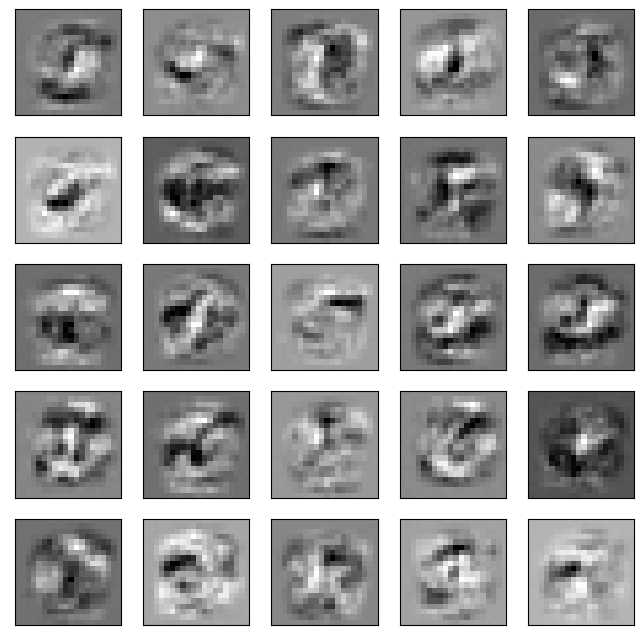

In [30]:
plot_hidden_layer(res.x)